In [101]:
from utils.read_data import DataConverter

import os
import random
import shutil

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Approach

    1. (O) Set max y-axis to be 100, x axis to be 300
    2. (O) Pad the image with black mask
    3. (O) Update the corresponding box annotations

## A. Quick test

In [124]:
project_path = "/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project"

In [125]:
test_image = cv2.imread(os.path.join(project_path, "data/google_digit_data/train/images/6.png"))
test_image.shape

(35, 74, 3)

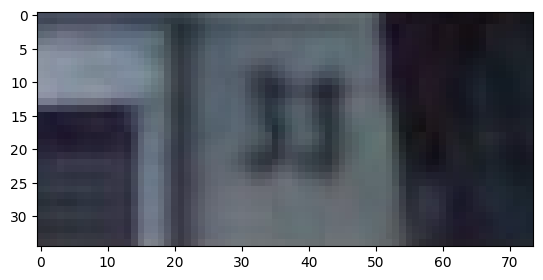

In [126]:
plt.imshow(test_image)

In [145]:
h_org = test_image.shape[0]
w_org = test_image.shape[1]
h_max = 100
w_max = 300

test_image_new = cv2.copyMakeBorder(test_image,
                   top=0,
                   bottom=h_max-h_org,
                   left=0,
                   right=w_max-w_org,
                   borderType=cv2.BORDER_CONSTANT)


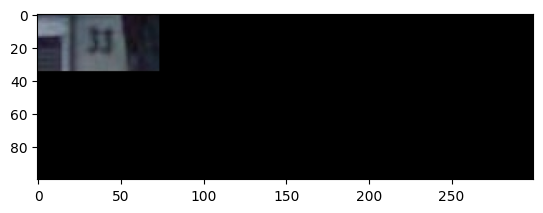

In [146]:
plt.imshow(test_image_new)

In [147]:
with open(os.path.join(project_path, "data/google_digit_data/train/labels/6.txt"), "r") as f:
    sample_annotation = f.read()
    f.close()
    
height=100
width=300
          
updated_annotation = []
for i in sample_annotation.split('\n')[:-1]:
    
    temp = i.split(' ')
    print(temp)
    temp[1] = round(float(temp[1]) * (w_org/w_max)*width)
    temp[2] = round(float(temp[2]) * (h_org/h_max)*height)
    temp[3] = round(float(temp[3]) * (w_org/w_max)*width)
    temp[4] = round(float(temp[4]) * (h_org/h_max)*height)
    
    # x min
    x_min = int(temp[1]-temp[3]/2)
    x_max = int(temp[1]+temp[3]/2)
    y_min = int(temp[2]-temp[4]/2)
    y_max = int(temp[2]+temp[4]/2)
    
    updated_annotation.append([temp[0], x_min,x_max,y_min,y_max])

['3', '0.445946', '0.471429', '0.135135', '0.600000']
['3', '0.587838', '0.528571', '0.148649', '0.600000']


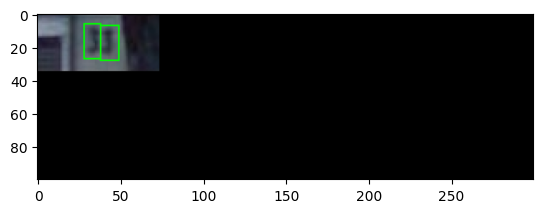

In [149]:
for i in updated_annotation:
    cv2.rectangle(test_image_new, pt1=(i[1],i[4]), pt2=(i[2],i[3]), color=(0,255,0), thickness=1)
plt.imshow(test_image_new)

## B. Create a new training data

In [77]:
train_imgs = os.listdir('./data/google_digit_data/train/images')
train_labels = os.listdir('./data/google_digit_data/train/labels')

In [156]:
# make a new directory
os.mkdir('./data/google_digit_data/test_new/')
os.mkdir('./data/google_digit_data/test_new/images')
os.mkdir('./data/google_digit_data/test_new/labels')

In [155]:
# shutil.rmtree('./data/google_digit_data/test_new/')

In [108]:
test_imgs = os.listdir('./data/google_digit_data/test/images')
test_idx = [i.split('.')[0] for i in test_imgs]

In [157]:
h_max = 100
w_max = 300

for i in test_idx:
    test_image = cv2.imread(os.path.join(project_path, f"data/google_digit_data/test/images/{i}.png"))
    h_org = test_image.shape[0]
    w_org = test_image.shape[1]
    
    if h_org <= h_max and w_org <= w_max:
        
        # pad the images 
        test_image_new = cv2.copyMakeBorder(test_image,
                       top=0,
                       bottom=h_max-h_org,
                       left=0,
                       right=w_max-w_org,
                       borderType=cv2.BORDER_CONSTANT)
        test_image_new = Image.fromarray(test_image_new)
        
        # save the padded image to the new folder
        test_image_new.save(os.path.join(project_path, f"data/google_digit_data/test_new/images/{i}.png"), 'png')
        
        # open the original annotation
        with open(os.path.join(project_path, f"data/google_digit_data/test/labels/{i}.txt"), 'r') as f:
            org_lab = f.read().split('\n')[:-1]
            f.close()

        # convert the annotation
        with open(os.path.join(project_path, f"data/google_digit_data/test_new/labels/{i}.txt"), 'a') as f:
            for i in org_lab:
                elems = i.split(' ')
                cls = elems[0]
                new_x_center = float(elems[1]) * (w_org/w_max)
                new_y_center = float(elems[2]) * (h_org/h_max)
                new_width = float(elems[3]) * (w_org/w_max)
                new_height = float(elems[4]) * (h_org/h_max)
                
                f.write("{} {:.6f} {:.6f} {:.6f} {:.6f}\n".format(cls, new_x_center, new_y_center, new_width, new_height))
            f.close()


In [158]:
print(len(os.listdir('data/google_digit_data/test_new/images')))
print(len(os.listdir('data/google_digit_data/test_new/labels')))

10521
10521


### do it for training

### do it for validation

## C. Test data conversion

In [159]:
test_image = cv2.imread(os.path.join(project_path, "data/google_digit_data/test_new/images/7483.png"))
test_image.shape
with open(os.path.join(project_path, "data/google_digit_data/test_new/labels/7483.txt"), "r") as f:
    sample_annotation = f.read()
    f.close()
    
height=test_image.shape[0]
width=test_image.shape[1]
          
updated_annotation = []
for i in sample_annotation.split('\n')[:-1]:
    
    temp = i.split(' ')
    print(temp)
    temp[1] = round(float(temp[1])*width)
    temp[2] = round(float(temp[2])*height)
    temp[3] = round(float(temp[3])*width)
    temp[4] = round(float(temp[4])*height)
    
    # x min
    x_min = int(temp[1]-temp[3]/2)
    x_max = int(temp[1]+temp[3]/2)
    y_min = int(temp[2]-temp[4]/2)
    y_max = int(temp[2]+temp[4]/2)
    
    updated_annotation.append([temp[0], x_min,x_max,y_min,y_max])

['3', '0.205000', '0.380000', '0.043333', '0.220000']
['7', '0.246667', '0.350000', '0.046667', '0.220000']


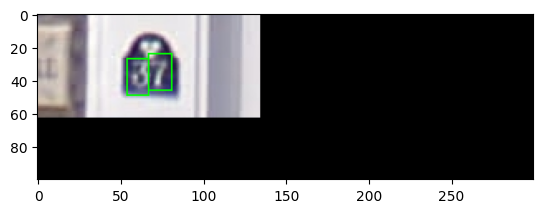

In [160]:
for i in updated_annotation:
    cv2.rectangle(test_image, pt1=(i[1],i[4]), pt2=(i[2],i[3]), color=(0,255,0), thickness=1)
plt.imshow(test_image)